# Project 1 Android Malware Detection dataset

#### Mikołaj Mróz, Michał Binda

## Part 1 Data Preprocessing

### Installing packages

### Importing packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from contextlib import contextmanager
from time import time
from tqdm import tqdm
import ipaddress
#import lightgbm as lgbm
#import category_encoders as ce

#from tensorflow.keras.utils import to_categorical
#from sklearn.metrics import classification_report, log_loss, accuracy_score
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import KFold

### Importing dataset, defining data types

In [3]:
# Define the data types for each column
dtypes = {"Package": str, "Category": str, "Malware": int}
for i in range(0, 64):
    dtypes[str(i)] = float

# Read in the CSV file with specified data types
data0 = pd.read_csv("Android_Malware.csv", dtype=dtypes, low_memory=False)

### Division into a training set and a validation set

In [4]:
train, val = train_test_split(data0, test_size = 0.3, random_state = 42)
# val, test = train_test_split(val, test_size = 0.3, random_state = 42)

In [5]:
print(f"No. of training examples: {train.shape[0]}")
# print(f"No. of testing examples: {test.shape[0]}")
print(f"No. of validating examples: {val.shape[0]}")

No. of training examples: 248941
No. of validating examples: 106689


### Downloading dataset

In [6]:
train.to_csv('train.csv', encoding = 'utf-8-sig') 
files.download('train.csv')

In [ ]:
# test.to_csv('test.csv', encoding = 'utf-8-sig') 
# files.download('test.csv')

In [ ]:
val.to_csv('val.csv', encoding = 'utf-8-sig') 
files.download('val.csv')

## Exploration of a data frame

In [6]:
#deleting unnecessary spaces from beginning and end of column names so
#we can explore it easier
def deleteSpaces(df):
    df.columns = df.columns.str.strip()
    return df
df = train
df = deleteSpaces(df)

In [7]:

display(df[0:3].T)
print(df.shape)


,225329,97062,86892
Unnamed: 0,504,4373,2163
Flow ID,10.42.0.211-52.84.40.181-53064-443-6,10.42.0.151-52.40.87.241-39035-443-6,10.42.0.151-115.239.210.141-48498-443-6
Source IP,10.42.0.211,10.42.0.151,10.42.0.151
Source Port,53064,39035,48498
Destination IP,52.84.40.181,52.40.87.241,115.239.210.141
...,...,...,...
Idle Mean,0.0,0.0,0.0
Idle Std,0.0,0.0,0.0
Idle Max,0.0,0.0,0.0
Idle Min,0.0,0.0,0.0


(248941, 86)


In [8]:
print(df.columns.tolist())

['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag

In [9]:
df.head(20)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
225329,504,10.42.0.211-52.84.40.181-53064-443-6,10.42.0.211,53064,52.84.40.181,443.0,6.0,28/06/2017 01:02:09,8958054,15,...,32.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Android_Scareware
97062,4373,10.42.0.151-52.40.87.241-39035-443-6,10.42.0.151,39035,52.40.87.241,443.0,6.0,15/06/2017 05:23:51,271,2,...,20.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Android_Adware
86892,2163,10.42.0.151-115.239.210.141-48498-443-6,10.42.0.151,48498,115.239.210.141,443.0,6.0,15/06/2017 02:15:49,38753377,3,...,20.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Android_Adware
128576,1418,10.42.0.211-10.42.0.1-23125-53-17,10.42.0.211,23125,10.42.0.1,53.0,17.0,15/06/2017 10:40:49,94428,1,...,20.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Android_Adware
346851,190,10.42.0.151-106.11.129.143-46195-80-6,10.42.0.151,46195,106.11.129.143,80.0,6.0,16/06/2017 08:12:07,536653,3,...,20.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Benign
190158,382,10.42.0.211-103.7.30.121-58452-8011-6,10.42.0.211,58452,103.7.30.121,8011.0,6.0,26/06/2017 10:32:47,551672,4,...,32.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Android_Scareware
339093,44,10.42.0.211-95.211.212.74-47723-1935-6,10.42.0.211,47723,95.211.212.74,1935.0,6.0,16/06/2017 09:49:54,115693483,76,...,32.0,6299258.25,5.897400e+06,14705396.0,105317.0,8.149084e+06,1.659377e+06,10663287.0,5694016.0,Benign
122411,2340,172.217.7.164-10.42.0.211-443-33189-6,10.42.0.211,33189,172.217.7.164,443.0,6.0,15/06/2017 02:19:38,62357987,9,...,32.0,166869.00,0.000000e+00,166869.0,166869.0,6.204488e+07,0.000000e+00,62044876.0,62044876.0,Android_Adware
300031,451,202.77.129.150-10.42.0.151-80-58277-6,10.42.0.151,58277,202.77.129.150,80.0,6.0,30/06/2017 01:16:57,2071596,6,...,20.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Android_SMS_Malware
291326,2023,10.42.0.211-104.254.66.16-49744-80-6,10.42.0.211,49744,104.254.66.16,80.0,6.0,11/07/2017 10:15:38,10177273,2,...,20.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Android_SMS_Malware


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248941 entries, 225329 to 121958
Data columns (total 86 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   248941 non-null  int64  
 1   Flow ID                      248940 non-null  object 
 2   Source IP                    248941 non-null  object 
 3   Source Port                  248941 non-null  int64  
 4   Destination IP               248941 non-null  object 
 5   Destination Port             248941 non-null  float64
 6   Protocol                     248941 non-null  float64
 7   Timestamp                    248941 non-null  object 
 8   Flow Duration                248941 non-null  int64  
 9   Total Fwd Packets            248941 non-null  int64  
 10  Total Backward Packets       248941 non-null  int64  
 11  Total Length of Fwd Packets  248941 non-null  float64
 12  Total Length of Bwd Packets  248941 non-null  float64

In [11]:
df.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,248941.000000,2.489410e+05,2.489410e+05,248941.000000,2.489410e+05,248941.000000,2.489410e+05,2.489410e+05,2.489410e+05,2.489410e+05,...,248937.000000,2.489370e+05,2.489370e+05,2.489370e+05,2.489370e+05,2.489370e+05,2.489370e+05,2.489370e+05,2.489370e+05,2.489370e+05
mean,1942.975894,3.915884e+04,5.198036e+03,10.368869,1.093717e+07,7.276335,1.539142e+01,6.409457e+02,1.074095e+04,2.167553e+02,...,1.478639,-1.853726e+04,1.606309e+05,2.164195e+04,1.826366e+05,1.437017e+05,4.020583e+06,3.151827e+05,4.296683e+06,3.775756e+06
std,1838.614623,1.798059e+04,1.458438e+04,897.063212,2.181404e+07,75.399674,2.648345e+03,1.076564e+04,2.232390e+05,2.179986e+03,...,9.521983,4.595411e+06,8.789559e+05,2.813724e+05,1.014601e+06,8.417036e+05,1.441516e+07,2.847628e+06,1.513010e+07,1.407142e+07
min,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,-1.395062e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,637.000000,3.455900e+04,8.000000e+01,6.000000,4.889000e+04,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1568.000000,4.325400e+04,4.430000e+02,6.000000,5.615880e+05,2.000000,1.000000e+00,3.100000e+01,2.600000e+01,3.100000e+01,...,0.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2711.000000,5.229800e+04,4.430000e+02,6.000000,1.077745e+07,5.000000,4.000000e+00,4.310000e+02,3.040000e+02,3.490000e+02,...,1.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,14157.000000,1.045267e+06,1.328159e+06,442719.666667,1.199987e+08,27165.000000,1.319105e+06,4.393732e+06,3.741910e+07,1.072354e+06,...,3035.000000,1.705248e+08,9.718488e+07,4.020815e+07,9.718488e+07,9.718488e+07,1.198804e+08,7.737303e+07,1.198804e+08,1.198804e+08


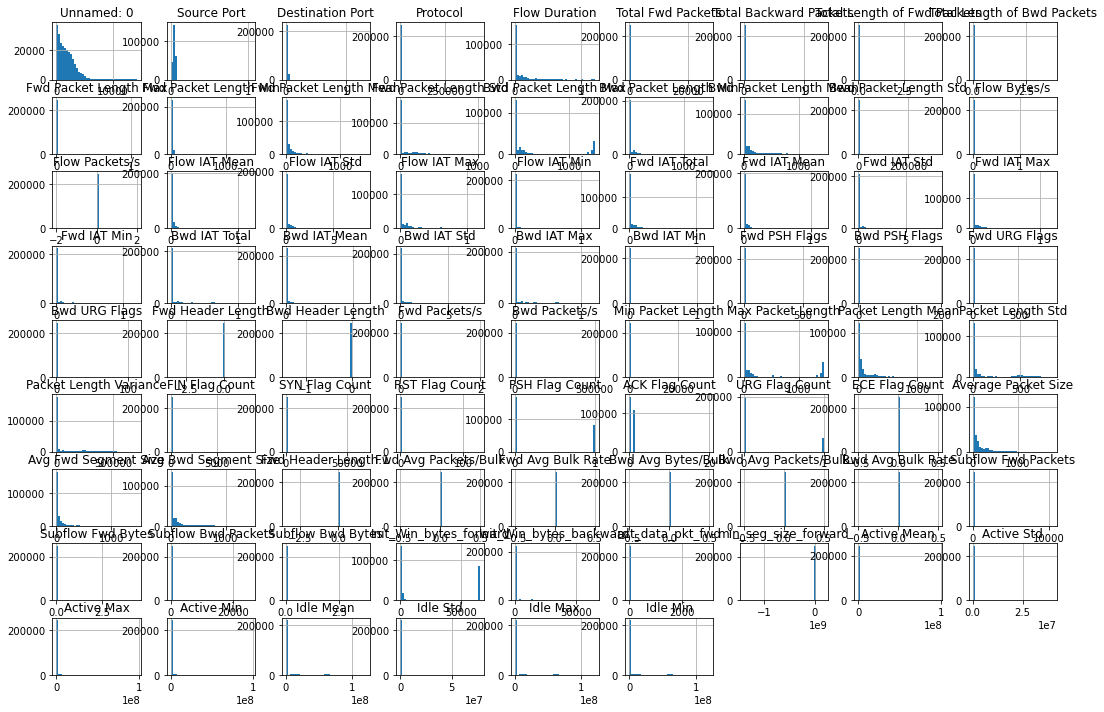

In [12]:
df.hist(bins = 40, figsize=(18, 12))

plt.show()

In [13]:
#Searching for nulls
df.isnull().sum().sum()

117

In [14]:

nan_values = df[df.isna().any(axis=1)]
print(nan_values)

        Unnamed: 0                                 Flow ID         Source IP  \
276556        2756                                     NaN                 0   
323136        2877                           7258830000000               281   
262292        2557                                    6923  291380.770637023   
285435        3165  172.217.10.238-10.42.0.151-443-50096-6       10.42.0.151   

        Source Port    Destination IP  Destination Port       Protocol  \
276556            0                 0      0.000000e+00       0.000000   
323136       124560  17794.2857142857      2.884435e+04   65812.000000   
262292      1045267                17      1.328159e+06  442719.666667   
285435        50096    172.217.10.238      4.430000e+02       6.000000   

                  Timestamp  Flow Duration  Total Fwd Packets  ...  \
276556                    0              0                  0  ...   
323136                    3              0                  0  ...   
262292     534188.

In [15]:
print(df['Label'].value_counts())
names=sorted(df['Label'].unique().tolist())
print(names)

Android_Adware         103311
Android_Scareware       81867
Android_SMS_Malware     47289
Benign                  16474
Name: Label, dtype: int64
['Android_Adware', 'Android_SMS_Malware', 'Android_Scareware', 'Benign']


In [16]:
#Checking unique values

for col in df.select_dtypes(include=["object"]).columns[:-1]:
  print(col)
print('----------------------------------------------')
names=df['Source IP'].unique().tolist()
print(len(names))
print('unique Source IP') #2257 unique Source IP

names=df['Destination IP'].unique().tolist()
print(len(names)) 
print('unique Destination IP')

names=df['Flow ID'].unique().tolist()
print(len(names)) 
print('unique Flow ID')

Flow ID
Source IP
Destination IP
Timestamp
CWE Flag Count
Down/Up Ratio
Fwd Avg Bytes/Bulk
----------------------------------------------
2260
unique Source IP
4381
unique Destination IP
149758
unique Flow ID


In [17]:
#counting correlation with Label CHECK
# corr = df.corr()[['Label']]
# sns.heatmap(corr, annot=True)
# corr['Label'] = abs(corr['Label'])
# print(corr)

In [18]:
#Finding columns with the same values
#It turned out that the columns that have NaN correlation with Label are the ones that have constant values
const_cols = [col for col in df.columns if df[col].nunique() == 1]
print(const_cols)

['ECE Flag Count', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [19]:
df_test = train

In [20]:
df['Down/Up Ratio'].value_counts()

0.0       108064
1.0       106345
0          14363
1          11707
2.0         5486
3.0         1369
2            782
4.0          295
3            266
5.0           85
4             54
6.0           28
8.0           24
7.0           22
5             16
12.0           9
6              8
10.0           4
11.0           3
11             2
7              2
9.0            2
BENIGN         1
9              1
12             1
Name: Down/Up Ratio, dtype: int64

In [21]:
df['Down/Up Ratio'].value_counts()

0.0       108064
1.0       106345
0          14363
1          11707
2.0         5486
3.0         1369
2            782
4.0          295
3            266
5.0           85
4             54
6.0           28
8.0           24
7.0           22
5             16
12.0           9
6              8
10.0           4
11.0           3
11             2
7              2
9.0            2
BENIGN         1
9              1
12             1
Name: Down/Up Ratio, dtype: int64

In [22]:
#df_test = replace_strings(df_test)

In [23]:
df['Down/Up Ratio'].value_counts()

0.0       108064
1.0       106345
0          14363
1          11707
2.0         5486
3.0         1369
2            782
4.0          295
3            266
5.0           85
4             54
6.0           28
8.0           24
7.0           22
5             16
12.0           9
6              8
10.0           4
11.0           3
11             2
7              2
9.0            2
BENIGN         1
9              1
12             1
Name: Down/Up Ratio, dtype: int64

In [24]:
print((df_test['Down/Up Ratio']== 0.0).sum())

0


In [25]:
df_test['Down/Up Ratio'].value_counts()

0.0       108064
1.0       106345
0          14363
1          11707
2.0         5486
3.0         1369
2            782
4.0          295
3            266
5.0           85
4             54
6.0           28
8.0           24
7.0           22
5             16
12.0           9
6              8
10.0           4
11.0           3
11             2
7              2
9.0            2
BENIGN         1
9              1
12             1
Name: Down/Up Ratio, dtype: int64

In [26]:
#print((df['CWE Flag Count']== 0.0).sum())

In [27]:
#df_test['Fwd Avg Bytes/Bulk'].value_counts()

In [28]:
#print((df_test['Fwd Avg Bytes/Bulk']== '0.0').sum())

In [29]:
#deleting unnecessary spaces from beginning and end of column names so
#we can explore it easier
# def deleteSpaces(df):
#     df.columns = df.columns.str.strip()
#     return df
# df = train
# df = deleteSpaces(df)

In [30]:
#df_test['Fwd Avg Bytes/Bulk'] = df_test['Fwd Avg Bytes/Bulk'].astype(float)

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248941 entries, 225329 to 121958
Data columns (total 86 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   248941 non-null  int64  
 1   Flow ID                      248940 non-null  object 
 2   Source IP                    248941 non-null  object 
 3   Source Port                  248941 non-null  int64  
 4   Destination IP               248941 non-null  object 
 5   Destination Port             248941 non-null  float64
 6   Protocol                     248941 non-null  float64
 7   Timestamp                    248941 non-null  object 
 8   Flow Duration                248941 non-null  int64  
 9   Total Fwd Packets            248941 non-null  int64  
 10  Total Backward Packets       248941 non-null  int64  
 11  Total Length of Fwd Packets  248941 non-null  float64
 12  Total Length of Bwd Packets  248941 non-null  float64

# Modification of a data frame

## Functions

In [32]:
# This is the first function we used, it deletes spaces from beginning and end of column names
# so that working with dataframe is easier 
def deleteSpaces(df):
    df.columns = df.columns.str.strip()
    return df

In [33]:
# There is not a lot of Nans in this dataframe but we decided to replace them instead of deleting them
# Every Nan is replace with mode from column where it is, when there is no mode it is replaced with most
# often occuring value in this dataframe
def replace_nan_with_mode_or_random(df):
    for col in df.columns:
        if df[col].dtype == np.object:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
        else:
            if df[col].isnull().sum() == len(df[col]):
                continue
            elif len(df[col].mode()) > 0:
                mode_val = df[col].mode()[0]
                df[col].fillna(mode_val, inplace=True)
            else:
                random_val = df[col].dropna().sample(1).values[0]
                df[col].fillna(random_val, inplace=True)
    return df

In [34]:
# Define a function to replace string values with the mode of the column
def replace_strings(df):
    def replace_mode(column):
        # Convert the column to numeric
        column_numeric = pd.to_numeric(column, errors='coerce')

        # Calculate the mode of the numeric values
        mode_value = column_numeric.mode()[0]

        # Replace any string values with the mode
        column_replaced = column.where(column_numeric.notna(), mode_value)

        # Convert the column to float or int, as applicable
        column_replaced = pd.to_numeric(column_replaced, errors='coerce')

        return column_replaced

    # Apply the replace_mode function to each column
    df['Down/Up Ratio'] = replace_mode(df['Down/Up Ratio'])
    df['CWE Flag Count'] = replace_mode(df['CWE Flag Count'])
    df['Fwd Avg Bytes/Bulk'] = replace_mode(df['Fwd Avg Bytes/Bulk'])
    return df

In [35]:
# At first we wanted to replace this date column but then we decided to modify it into Year, Month and Day
# We did not do anything to hour time, because we do not know if it is PM or AM
def modify_timestamp(df):
    def extract_date(timestamp_str):
        # check if the timestamp is in the correct format
        try:
            timestamp_obj = pd.to_datetime(timestamp_str, format='%d/%m/%Y %H:%M:%S')
        except ValueError:
            # if the format is incorrect, replace it with the most frequent value in the 'Timestamp' column
            timestamp_obj = pd.to_datetime(df['Timestamp'].value_counts().index[0], format='%d/%m/%Y %H:%M:%S')

        year = timestamp_obj.year
        month = timestamp_obj.month
        day = timestamp_obj.day
        return year, month, day
    
    df[['Year', 'Month', 'Day']] = df['Timestamp'].apply(extract_date).apply(pd.Series)
    return df


In [36]:
# Down Up Ratio is an Object Column, it is because we have values like '4' and '4.0'
# we decided to change it to Int type
def changeTypeForInt(df):
    df['Down/Up Ratio']=df['Down/Up Ratio'].apply(lambda x:int(float(x)))
    return df

In [37]:
#coding Label column, we decided to code this column so that it works better with our model

#{'Android_Adware': 0, 'Android_SMS_Malware': 1, 'Android_Scareware': 2, 'Benign': 3} 

#['Android_Adware', 'Android_SMS_Malware', 'Android_Scareware', 'Benign']
def labelencoder(df):
    # define the label mapping
    label_mapping = {'Android_Adware': 0, 'Android_SMS_Malware': 1, 'Android_Scareware': 2, 'Benign': 3}

    # encode the 'Label' column using map() method
    df['Label_encoded'] = df['Label'].map(label_mapping)
    return df

In [38]:
# We deleted columns where the values are the same, they do not influence or Label prediction
def deleteConstCols(df2):
    const_cols = [col for col in df2.columns if df2[col].nunique() == 1]
    #usunięcie
    df2.drop(columns=const_cols, inplace=True)
    return df2

In [39]:
#not sure if we will use it
def CorrColumns(df2):
    corr_matrix = df2.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
    if to_drop:
        df3 = df2.drop(to_drop, axis=1)
    return df3

In [40]:
# We decided to replace this rows because they were clearly wrong
def delete_wrong_rows(df):
    index_to_drop = df[df['Down/Up Ratio'] == 'BENIGN'].index.to_list()
    df.drop(index_to_drop, axis=0, inplace=True)
#     index_to_drop = df[df['Timestamp'] == '0'].index.to_list()
#     df.drop(index_to_drop, axis=0, inplace=True)
    return df

In [41]:
# def delete_invalid_ip_addresses(df, col_name):
#     """
#     Deletes the rows from the given DataFrame where the specified column contains invalid IP addresses.
    
#     Parameters:
#         df (pandas.DataFrame): The DataFrame to modify.
#         col_name (str): The name of the column containing the IP addresses to check.
        
#     Returns:
#         None
#     """
#     ip_series = df[col_name]
#     invalid_mask = pd.Series(dtype=bool, index=ip_series.index)
#     for i, ip in ip_series.items():
#         try:
#             ipaddress.ip_address(ip)
#             invalid_mask.at[i] = False
#         except ValueError:
#             invalid_mask.at[i] = True
#     invalid_indices = invalid_mask[invalid_mask].index
#     df.drop(invalid_indices, inplace=True)
#     print(f"Deleted rows with invalid IP addresses.")
#     return df

In [42]:
# There is 2 columns with ID adresses that are Object Type
# We cannot leave them, we decided to change them first into binary and then into decimal
# There were some wrong IP addresses that could not be modified, we decided to replace them
# We replaced them with the most often ocurring value in a column
# modify so it replaces with mode

import ipaddress

def replace_invalid_ip_addresses(df, col_name):
    """
    Replaces the invalid IP addresses in the given DataFrame column with the most frequently occurring valid IP address.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame to modify.
        col_name (str): The name of the column containing the IP addresses to check.
        
    Returns:
        None
    """
    ip_series = df[col_name]
    invalid_mask = pd.Series(dtype=bool, index=ip_series.index)
    for i, ip in ip_series.items():
        try:
            ipaddress.ip_address(ip)
            invalid_mask.at[i] = False
        except ValueError:
            invalid_mask.at[i] = True
    
    invalid_indices = invalid_mask[invalid_mask].index
    valid_ips = ip_series[~invalid_mask]
    most_common_ip = valid_ips.mode()[0]
    
    df.loc[invalid_indices, col_name] = most_common_ip
    
    print(f"Replaced {len(invalid_indices)} rows with invalid IP addresses with the most frequently occurring valid IP address: {most_common_ip}")
    return df

In [43]:
# This is the function that converts ip addresses into decimal numbers
def ip_to_decimal_df(df):

    def ip_to_decimal(ip):
        # Split the IP address into octets
        octets = ip.split('.')
        #print(octets)
        # Convert each octet to binary and combine them into a single 32-bit number
        binary = '{0:08b}{1:08b}{2:08b}{3:08b}'.format(*map(int, octets))
        decimal = int(binary, 2) # Convert binary to decimal
        return decimal

    # Create new columns for decimal representation of IP addresses
    df['Source IP Decimal'] = df['Source IP'].apply(ip_to_decimal)
    df['Destination IP Decimal'] = df['Destination IP'].apply(ip_to_decimal)
    return df

In [44]:
# We delete columns that we either modified or divided into other columns and these are not necessary anymore
def delete_unnecessary_columns(df):
    df = df.drop('Timestamp', axis = 1)
    df = df.drop('Flow ID', axis = 1)
    df = df.drop('Unnamed: 0', axis = 1)
    df = df.drop('Source IP', axis = 1)
    df = df.drop('Destination IP', axis = 1)
    df = df.drop('Month', axis = 1)
    df = df.drop('Day', axis = 1)
    #df = df.drop('Label', axis = 1)
    return df

In [45]:
def move_label_to_end(df):
    """
    Move column 'Label' to the end of the Pandas dataframe 'df'.
    """
    cols = list(df.columns)
    if 'Label' in cols:
        cols.remove('Label')
        cols.append('Label')
        return df[cols]
    else:
        raise ValueError("The dataframe does not have a column named 'Label'.")

In [46]:
# This function takes dataset as an input and outputs preprocessed data frame, ready to put into model
def preprocess(df):
    df.reset_index(drop=True, inplace=True)
    
    df = deleteSpaces(df)
    df = modify_timestamp(df)
    df = replace_nan_with_mode_or_random(df)
    df=df.drop('Fwd Avg Bytes/Bulk',axis=1)
    df=df.drop('CWE Flag Count',axis=1)
    df2 = delete_wrong_rows(df)
    df2 = changeTypeForInt(df2)
    df2 = deleteConstCols(df2)
    df3 = replace_invalid_ip_addresses(df2, 'Source IP')
    df4 = replace_invalid_ip_addresses(df3, 'Destination IP')
    df4 = ip_to_decimal_df(df4)
    #df4 = labelencoder(df4)
    df4 = delete_unnecessary_columns(df4)
    df4 = move_label_to_end(df4)
    return df4


## Testing written functions on training dataset

In [47]:
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
225329,504,10.42.0.211-52.84.40.181-53064-443-6,10.42.0.211,53064,52.84.40.181,443.0,6.0,28/06/2017 01:02:09,8958054,15,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
97062,4373,10.42.0.151-52.40.87.241-39035-443-6,10.42.0.151,39035,52.40.87.241,443.0,6.0,15/06/2017 05:23:51,271,2,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
86892,2163,10.42.0.151-115.239.210.141-48498-443-6,10.42.0.151,48498,115.239.210.141,443.0,6.0,15/06/2017 02:15:49,38753377,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
128576,1418,10.42.0.211-10.42.0.1-23125-53-17,10.42.0.211,23125,10.42.0.1,53.0,17.0,15/06/2017 10:40:49,94428,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
346851,190,10.42.0.151-106.11.129.143-46195-80-6,10.42.0.151,46195,106.11.129.143,80.0,6.0,16/06/2017 08:12:07,536653,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [48]:
df_preprocessed = preprocess(df)

C:\Users\mroz.m\AppData\Local\Temp\ipykernel_1312\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_1312\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_1312\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by it

C:\Users\mroz.m\AppData\Local\Temp\ipykernel_1312\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_1312\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_1312\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by it

C:\Users\mroz.m\AppData\Local\Temp\ipykernel_1312\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_1312\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_1312\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by it

C:\Users\mroz.m\AppData\Local\Temp\ipykernel_1312\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_1312\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_1312\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by it

Replaced 2 rows with invalid IP addresses with the most frequently occurring valid IP address: 10.42.0.211
Replaced 2 rows with invalid IP addresses with the most frequently occurring valid IP address: 10.42.0.1


In [49]:
df_preprocessed.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Source IP Decimal,Destination IP Decimal,Label
0,53064,443.0,6.0,8958054,15,10,3206.0,2696.0,567.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170524883,877930677,Android_Scareware
1,39035,443.0,6.0,271,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170524823,875059185,Android_Adware
2,48498,443.0,6.0,38753377,3,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170524823,1945096845,Android_Adware
3,23125,53.0,17.0,94428,1,1,33.0,94.0,33.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170524883,170524673,Android_Adware
4,46195,80.0,6.0,536653,3,6,1169.0,3336.0,1169.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170524823,1779138959,Benign


## Model Implementation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
dataset = df_test

# Split the dataset into training and testing sets
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate multiple models
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Neural Network', MLPClassifier()))

results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append(acc)
    names.append(name)
    print("%s: %f" % (name, acc))

# Compare model performances
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(names, results)
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, classification_report

In [51]:
df_preprocessed.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Source IP Decimal,Destination IP Decimal,Label
0,53064,443.0,6.0,8958054,15,10,3206.0,2696.0,567.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170524883,877930677,Android_Scareware
1,39035,443.0,6.0,271,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170524823,875059185,Android_Adware
2,48498,443.0,6.0,38753377,3,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170524823,1945096845,Android_Adware
3,23125,53.0,17.0,94428,1,1,33.0,94.0,33.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170524883,170524673,Android_Adware
4,46195,80.0,6.0,536653,3,6,1169.0,3336.0,1169.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170524823,1779138959,Benign


In [24]:
# Decision Tree Classifier
# without precision
# Split the dataset into training and testing sets
dataset = df_preprocessed
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Decision Tree Classifier model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a dictionary of feature names and their importances
feature_importances = dict(zip(dataset.columns[:-1], importances))

# Sort the dictionary in descending order of importance
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the most important features
print("Most important features:")
for feature, importance in sorted_importances:
    print("%s: %f" % (feature, importance))

# Test the model and print the accuracy score
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score: %f" % acc)


Most important features:
Day: 0.703877
Month: 0.182897
Source IP Decimal: 0.050287
Destination IP Decimal: 0.014023
Source Port: 0.010023
Init_Win_bytes_forward: 0.002790
Flow IAT Min: 0.002533
Fwd IAT Min: 0.002269
Fwd Packets/s: 0.002019
Flow IAT Max: 0.001812
Flow Duration: 0.001669
Flow Bytes/s: 0.001551
Destination Port: 0.001525
Init_Win_bytes_backward: 0.001318
Bwd Packets/s: 0.001262
Flow Packets/s: 0.001255
Fwd IAT Total: 0.001167
Fwd IAT Mean: 0.001142
Flow IAT Mean: 0.001120
Fwd IAT Max: 0.000974
Fwd IAT Std: 0.000937
Flow IAT Std: 0.000831
Bwd IAT Min: 0.000742
Fwd Packet Length Mean: 0.000609
Fwd Header Length: 0.000516
Packet Length Variance: 0.000496
Packet Length Mean: 0.000492
min_seg_size_forward: 0.000481
Average Packet Size: 0.000451
Bwd Packet Length Std: 0.000438
Bwd IAT Mean: 0.000418
Total Length of Fwd Packets: 0.000412
Bwd Header Length: 0.000402
Bwd IAT Total: 0.000401
Fwd Header Length.1: 0.000398
Fwd Packet Length Std: 0.000397
Fwd Packet Length Max: 0.0003

In [52]:
# Decision Tree Classifier
# with precision
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Load the preprocessed dataset
dataset = df_preprocessed

# Split the dataset into training and testing sets
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a dictionary of feature names and their importances
feature_importances = dict(zip(dataset.columns[:-1], importances))

# Sort the dictionary in descending order of importance
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the most important features
print("Most important features:")
for feature, importance in sorted_importances:
    print("%s: %f" % (feature, importance))

# Test the model and print the accuracy and precision scores
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
print("Accuracy score: %f" % acc)
print("Precision score: %f" % prec)


Most important features:
Day: 0.703877
Month: 0.182897
Source IP Decimal: 0.050294
Destination IP Decimal: 0.014079
Source Port: 0.009988
Init_Win_bytes_forward: 0.002842
Flow IAT Min: 0.002492
Fwd IAT Min: 0.002321
Fwd Packets/s: 0.002149
Flow Duration: 0.001777
Flow IAT Max: 0.001738
Flow Bytes/s: 0.001533
Flow IAT Mean: 0.001447
Destination Port: 0.001396
Init_Win_bytes_backward: 0.001354
Bwd Packets/s: 0.001336
Fwd IAT Mean: 0.001196
Flow Packets/s: 0.001082
Fwd IAT Total: 0.001056
Fwd IAT Std: 0.001043
Fwd IAT Max: 0.000788
Bwd IAT Min: 0.000728
Flow IAT Std: 0.000669
Packet Length Mean: 0.000540
min_seg_size_forward: 0.000499
Fwd Header Length: 0.000491
Fwd Packet Length Max: 0.000481
Fwd Packet Length Mean: 0.000477
Bwd Packet Length Std: 0.000477
Avg Fwd Segment Size: 0.000465
Bwd IAT Mean: 0.000460
Bwd IAT Total: 0.000456
Average Packet Size: 0.000450
Packet Length Variance: 0.000449
Fwd Header Length.1: 0.000443
Packet Length Std: 0.000395
Total Length of Fwd Packets: 0.00037

In [52]:
# Decision Tree Classifier
# with precision and report
import matplotlib.pyplot as plt


# Load the preprocessed dataset
dataset = df_preprocessed

# Split the dataset into training and testing sets
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a dictionary of feature names and their importances
feature_importances = dict(zip(dataset.columns[:-1], importances))

# Sort the dictionary in descending order of importance
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the most important features
print("Most important features:")
for feature, importance in sorted_importances:
    print("%s: %f" % (feature, importance))

# Test the model and print the accuracy, precision, and classification report
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)
print("Accuracy score: %f" % acc)
print("Precision score: %f" % prec)
print("Classification report:\n", report)


Most important features:
Source Port: 0.193814
Destination IP Decimal: 0.109994
Source IP Decimal: 0.078576
Flow IAT Min: 0.039006
Destination Port: 0.035493
Flow Bytes/s: 0.030152
Init_Win_bytes_forward: 0.029648
Flow IAT Max: 0.027514
Flow Duration: 0.026567
Fwd Packets/s: 0.025214
Fwd IAT Min: 0.025059
Bwd Packets/s: 0.024263
Flow IAT Mean: 0.022218
Flow Packets/s: 0.021823
Init_Win_bytes_backward: 0.019009
Fwd IAT Total: 0.014379
Fwd IAT Max: 0.013260
Fwd IAT Mean: 0.013069
Flow IAT Std: 0.012028
Packet Length Std: 0.011311
Fwd IAT Std: 0.011141
Bwd IAT Min: 0.010431
Bwd Header Length: 0.010369
Packet Length Mean: 0.009524
Packet Length Variance: 0.008950
Average Packet Size: 0.008636
Fwd Packet Length Max: 0.008626
min_seg_size_forward: 0.008120
Fwd Packet Length Std: 0.007976
Fwd Header Length: 0.007343
Bwd IAT Max: 0.007266
Bwd IAT Total: 0.006983
Fwd Header Length.1: 0.006646
Bwd Packet Length Std: 0.006562
Subflow Bwd Bytes: 0.006271
Bwd IAT Std: 0.006165
Subflow Fwd Bytes: 0.

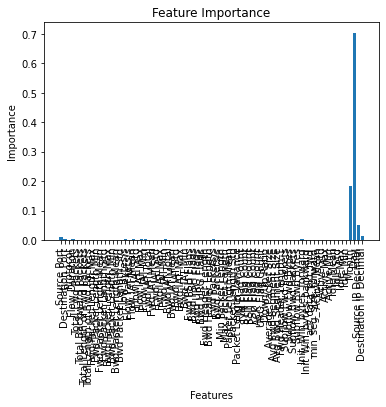

In [67]:
import matplotlib.pyplot as plt

# Plot the feature importances
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), dataset.columns[:-1], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

# Show the plot
plt.show()


In [59]:
# Logistic Regression Classifier
# with precision
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Load the preprocessed dataset
dataset = df_preprocessed

# Split the dataset into training and testing sets
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression Classifier model
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

# Get feature importances (coefficients)
importances = model.coef_[0]

# Create a dictionary of feature names and their importances
feature_importances = dict(zip(dataset.columns[:-1], importances))

# Sort the dictionary in descending order of importance
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the most important features
print("Most important features:")
for feature, importance in sorted_importances:
    print("%s: %f" % (feature, importance))

# Test the model and print the accuracy and precision scores
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
print("Accuracy score: %f" % acc)
print("Precision score: %f" % prec)


Most important features:
Flow Bytes/s: 0.000000
Flow IAT Max: 0.000000
Flow Duration: 0.000000
Active Min: 0.000000
Bwd IAT Mean: 0.000000
Bwd IAT Std: 0.000000
Active Mean: 0.000000
min_seg_size_forward: 0.000000
Flow IAT Min: 0.000000
Source Port: 0.000000
Active Max: 0.000000
Fwd IAT Min: 0.000000
Init_Win_bytes_forward: 0.000000
Idle Max: 0.000000
Flow Packets/s: 0.000000
Fwd Packets/s: 0.000000
Idle Std: 0.000000
Subflow Bwd Bytes: 0.000000
Total Length of Bwd Packets: 0.000000
Source IP Decimal: 0.000000
Fwd IAT Mean: 0.000000
Destination IP Decimal: 0.000000
Init_Win_bytes_backward: 0.000000
Fwd Header Length.1: 0.000000
Fwd Header Length: 0.000000
Bwd Packets/s: 0.000000
Destination Port: 0.000000
Bwd Packet Length Min: 0.000000
Min Packet Length: 0.000000
Fwd Packet Length Min: 0.000000
Average Packet Size: 0.000000
Avg Fwd Segment Size: 0.000000
Fwd Packet Length Mean: 0.000000
Avg Bwd Segment Size: 0.000000
Bwd Packet Length Mean: 0.000000
Packet Length Mean: 0.000000
Month:

C:\Users\mroz.m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mroz.m\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# Gaussian
# with precision
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Load the preprocessed dataset
dataset = df_preprocessed

# Split the dataset into training and testing sets
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gaussian model
model = GaussianNB()
model.fit(X_train, y_train)

# # Get feature importances
# importances = model.feature_importances_

# # Create a dictionary of feature names and their importances
# feature_importances = dict(zip(dataset.columns[:-1], importances))

# # Sort the dictionary in descending order of importance
# sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# # Print the most important features
# print("Most important features:")
# for feature, importance in sorted_importances:
#     print("%s: %f" % (feature, importance))

# Test the model and print the accuracy and precision scores
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
print("Accuracy score: %f" % acc)
print("Precision score: %f" % prec)


Accuracy score: 0.369928
Precision score: 0.270681


In [57]:
# Random Tree Classifier
# with precision
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Load the preprocessed dataset
dataset = df_preprocessed

# Split the dataset into training and testing sets
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# # Get feature importances
# importances = model.feature_importances_

# # Create a dictionary of feature names and their importances
# feature_importances = dict(zip(dataset.columns[:-1], importances))

# # Sort the dictionary in descending order of importance
# sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# # Print the most important features
# print("Most important features:")
# for feature, importance in sorted_importances:
#     print("%s: %f" % (feature, importance))

# Test the model and print the accuracy and precision scores
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
print("Accuracy score: %f" % acc)
print("Precision score: %f" % prec)


KeyboardInterrupt: 

In [52]:
# wrong
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Load the preprocessed dataset
dataset_train = df_preprocessed
dataset_test = preprocess(test)

# Split the dataset into training and testing sets
X_train = dataset_train.iloc[:, :-1].values
y_train = dataset_train.iloc[:, -1].values
X_test = dataset_test.iloc[:, :-1].values
y_test = dataset_test.iloc[:, -1].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a dictionary of feature names and their importances
feature_importances = dict(zip(dataset_train.columns[:-1], importances))

# Sort the dictionary in descending order of importance
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the most important features
print("Most important features:")
for feature, importance in sorted_importances:
    print("%s: %f" % (feature, importance))

# Test the model and print the accuracy and precision scores
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
print("Accuracy score: %f" % acc)
print("Precision score: %f" % prec)


C:\Users\mroz.m\AppData\Local\Temp\ipykernel_20384\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_20384\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_20384\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by

Replaced 0 rows with invalid IP addresses with the most frequently occurring valid IP address: 10.42.0.211
Replaced 0 rows with invalid IP addresses with the most frequently occurring valid IP address: 10.42.0.1
Most important features:
Day: 0.706141
Month: 0.184151
Source IP Decimal: 0.050516
Destination IP Decimal: 0.014452
Source Port: 0.010907
Flow IAT Min: 0.002707
Init_Win_bytes_forward: 0.002244
Fwd Packets/s: 0.001601
Flow IAT Max: 0.001598
Fwd IAT Min: 0.001443
Destination Port: 0.001442
Flow IAT Mean: 0.001296
Flow Bytes/s: 0.001285
Flow Duration: 0.001203
Bwd Packets/s: 0.001109
Init_Win_bytes_backward: 0.001069
Flow Packets/s: 0.001024
Fwd IAT Mean: 0.000989
Fwd IAT Max: 0.000960
Fwd IAT Std: 0.000898
Fwd IAT Total: 0.000801
Bwd IAT Min: 0.000690
Flow IAT Std: 0.000679
Average Packet Size: 0.000520
Fwd Header Length.1: 0.000501
Fwd Header Length: 0.000476
Fwd Packet Length Max: 0.000467
Packet Length Mean: 0.000449
Bwd Header Length: 0.000449
Fwd Packet Length Std: 0.000412

ValueError: X has 72 features, but DecisionTreeClassifier is expecting 76 features as input.

In [25]:
# Split the dataset into training and testing sets
dataset = train_preprocessed
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Test the model and print the accuracy score
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score: %f" % acc)

Accuracy score: 0.940247


In [ ]:
# Split the dataset into training and testing sets
dataset = train_preprocessed
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
model = SVC()
model.fit(X_train, y_train)

# Test the model and print the accuracy score
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score: %f" % acc)

In [218]:
# Split the dataset into training and testing sets
dataset = train_preprocessed
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Test the model and print the accuracy score
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score: %f" % acc)

Accuracy score: 0.678557


In [218]:
# Split the dataset into training and testing sets
dataset = train_preprocessed
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Classifier model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Test the model and print the accuracy score
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score: %f" % acc)

Accuracy score: 0.678557


In [218]:
# Split the dataset into training and testing sets
dataset = train_preprocessed
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Neural Network model
model = MLPClassifier()
model.fit(X_train, y_train)

# Test the model and print the accuracy score
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score: %f" % acc)

Accuracy score: 0.678557
